In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Salary_dataset.csv")

In [7]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [9]:
df = data[["YearsExperience","Salary"]]

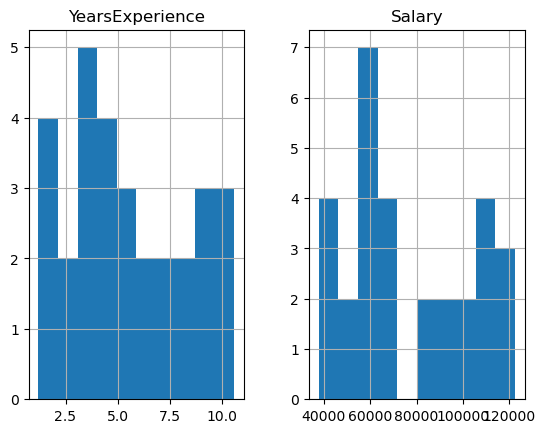

In [11]:
df.hist()
plt.show()

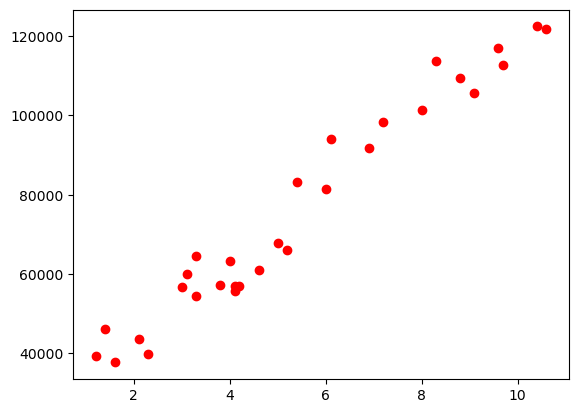

In [13]:
plt.scatter( df.YearsExperience ,df.Salary , color = "red")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8

In [17]:
msk

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [35]:
train = df[msk]
test = df[~msk]

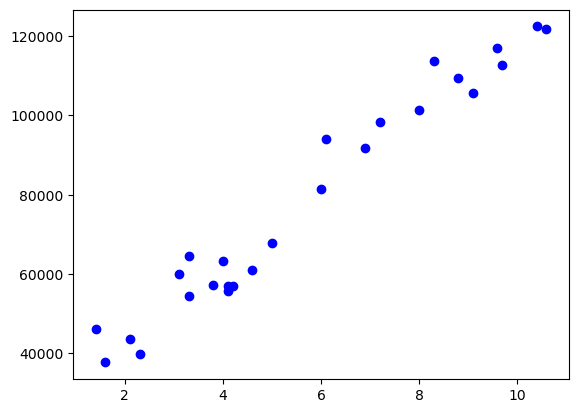

In [37]:
plt.scatter(train.YearsExperience , train.Salary , color = "blue")
plt.show()

In [41]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["YearsExperience"]])
train_y = np.asanyarray(train[["Salary"]])

In [47]:
lr.fit(train_x,train_y)
print("coefficients : " , lr.coef_)
print("intercept : " , lr.intercept_)

coefficients :  [[9553.51369731]]
intercept :  [24035.20685679]


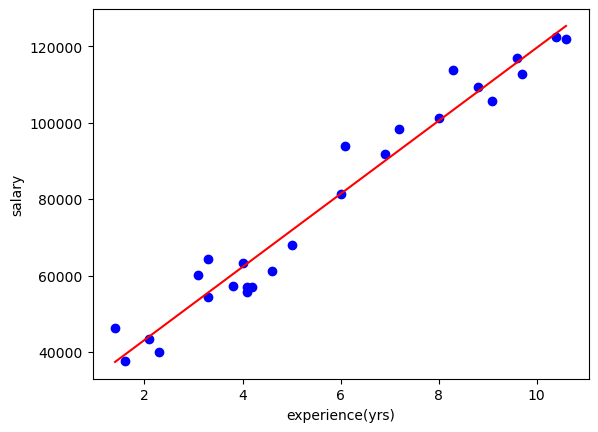

In [49]:
plt.scatter(train.YearsExperience , train.Salary , color = "blue")
plt.plot(train_x , lr.coef_[0][0]*train_x + lr.intercept_ , color = "red")
plt.xlabel("experience(yrs)")
plt.ylabel("salary")
plt.show()

In [51]:
from sklearn.metrics import r2_score 

In [53]:
test_x = np.asanyarray(test[["YearsExperience"]])
test_y = np.asanyarray(test[["Salary"]])
test_y_ = lr.predict(test_x)
print("mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("mean squared errro : %.2f" % np.mean(np.absolute(test_y_ - test_y)**2))
print("r2_ score is : %.2f" % r2_score(test_y , test_y_))

mean absolute error : 5735.03
mean squared errro : 36280232.40
r2_ score is : 0.86
